In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [258]:
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [141]:
pip install geopandas

In [509]:
trash_df = pd.read_csv('../data/trash_hauler_report_with_lat_lng.csv')

In [511]:
trash_df.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861


In [515]:
trash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request Number    20226 non-null  int64  
 1   Date Opened       20226 non-null  object 
 2   Request           20226 non-null  object 
 3   Description       20195 non-null  object 
 4   Incident Address  20217 non-null  object 
 5   Zip Code          20151 non-null  float64
 6   Trash Hauler      19325 non-null  object 
 7   Trash Route       19279 non-null  object 
 8   Council District  20177 non-null  float64
 9   State Plan X      20198 non-null  float64
 10  State Plan Y      20198 non-null  float64
 11  LONGITUDE         20198 non-null  float64
 12  LATITUDE          20198 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 2.0+ MB


In [203]:
red_river = trash_df[trash_df['Trash Hauler'] =='RED RIVER']

Filtered to just the Red River Trash Hauler

In [205]:
red_river.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE,Cost
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292,11/1/201711/1/201711/1/201711/1/201711/1/20171...
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470,11/1/201711/1/201711/1/201711/1/201711/1/20171...
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923,11/1/201711/1/201711/1/201711/1/201711/1/20171...
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861,11/1/201711/1/201711/1/201711/1/201711/1/20171...
5,25317,11/1/2017,Trash Collection Complaint,left trash cart in middle of driveway instead ...,3602 floral dr,37211.0,RED RIVER,4304,16.0,1751660.164,643215.2011,-86.733980,36.098140,11/1/201711/1/201711/1/201711/1/201711/1/20171...


In [215]:
red_river_missed = red_river[red_river['Request'] =='Trash - Curbside/Alley Missed Pickup']

Filtered to just Missed Pickups

In [217]:
red_river_missed.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE,Cost
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470,11/1/201711/1/201711/1/201711/1/201711/1/20171...
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923,11/1/201711/1/201711/1/201711/1/201711/1/20171...
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861,11/1/201711/1/201711/1/201711/1/201711/1/20171...
8,25330,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1794533.514,618749.3427,-86.588364,36.031728,11/1/201711/1/201711/1/201711/1/201711/1/20171...
10,25341,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed trash pickup - resident has at curb for...,3113 HYDES FERRY RD,37218.0,RED RIVER,4204,2.0,1721577.768,676018.3999,-86.836750,36.187584,11/1/201711/1/201711/1/201711/1/201711/1/20171...


In [219]:
multicounts = red_river_missed.groupby(['Incident Address'])['Date Opened'].count()

Grouped by the address, so I could determine the number of missed pickups per address

In [221]:
multicounts = multicounts.reset_index()

Reset the index to create a dataframe

In [223]:
multicounts

,Incident Address,Date Opened
0,"100 Bluefield Square, Nashville, TN 37214, Uni...",1
1,100 Braxton Hill Ct,1
2,100 Brook Hollow Rd,1
3,"100 Clydelan Ct, Nashville, TN 37205, United S...",2
4,"100 Desoto Dr, Nashville, TN 37210, United States",1
...,...,...
8185,"Old Tusculum Rd, Antioch, Tennessee, 37013",1
8186,"Queens Ln, Nashville, TN 37218, United States",1
8187,Robin Springs Rd,1
8188,"Trevino Pl, Nashville, TN 37013, United States",1


In [229]:
two_or_more = multicounts[multicounts['Date Opened'] > 1]

Filtered to multiple incidents of Missed Pickups in the Red River subset

In [231]:
two_or_more

,Incident Address,Date Opened
3,"100 Clydelan Ct, Nashville, TN 37205, United S...",2
8,"100 Lincoln Ct, Nashville, TN 37205, United St...",2
9,"100 Nashboro Greens, Nashville, TN 37217, Unit...",2
12,"100 Rhine Dr, Nashville, TN 37115, United States",2
21,"1000 Flintlock Ct, Nashville, TN 37217, United...",2
...,...,...
8148,946 Youngs Ln,2
8149,"947 Glendale Ln, Nashville, TN 37204, United S...",2
8162,"960 44th Ave N, Nashville, TN 37209, United St...",2
8169,"971 Windrowe Dr, Nashville, TN 37205, United S...",2


In [233]:
two_or_more.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1551 entries, 3 to 8173
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Incident Address  1551 non-null   object
 1   Date Opened       1551 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 36.4+ KB


In [235]:
def costs(row):
    return row * 200

In [237]:
corrected_cost = lambda x: (x-1) * 200

Created a single function that removed the first instance of missed pickup since they are only fined 200 USD after missing more than one time

In [239]:
corrected_cost_df = corrected_cost(two_or_more['Date Opened'])

In [241]:
corrected_cost_df = corrected_cost_df.reset_index()

In [243]:
corrected_cost_df.head()

,index,Date Opened
0,3,200
1,8,200
2,9,200
3,12,200
4,21,200


In [245]:
corrected_cost_df['Date Opened'].sum()

504800

Above is the adjusted, corrected cost of the missed pickups. The number of missed pickups per address, adjusted for one allowed missed pickup before the 200 USD fee is incurred. Returned value is the total 504,800 USD fee for all missed pickups.

In [517]:
trash_df_grouped = trash_df.groupby('Request').count()

In [519]:
trash_df_grouped

,Request Number,Date Opened,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
Request,,,,,,,,,,,,
Damage to Property,257,257,257,257,254,246,234,256,256,256,256,256
Trash - Backdoor,2629,2629,2627,2628,2621,2519,2520,2623,2624,2624,2624,2624
Trash - Curbside/Alley Missed Pickup,15028,15028,14999,15020,14972,14422,14405,14991,15007,15007,15007,15007
Trash Collection Complaint,2312,2312,2312,2312,2304,2138,2120,2307,2311,2311,2311,2311


In [521]:
damage = trash_df[trash_df['Request'] == 'Damage to Property']

In [523]:
damage.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
6,25325,11/1/2017,Damage to Property,Trash/emptied Wednesday & now metal black-mail...,4721 Chalmers Dr,37215.0,RED RIVER,3303,34.0,1726300.965,637078.4022,-86.819640,36.080729
173,26971,11/8/2017,Damage to Property,truck is cutting into yard and damaging lawn,717 garrison dr,37207.0,RED RIVER,3205,2.0,1727317.062,688538.0878,-86.817657,36.222107
257,28158,11/15/2017,Damage to Property,cable lines pulled from house - caused damage ...,6347 alamo pl,37209.0,RED RIVER,4203,20.0,1711130.449,663421.4019,-86.871771,36.152731
360,29388,11/21/2017,Damage to Property,Customer does not understands why trash-truck ...,717 Troy Dr,37207.0,RED RIVER,3205,2.0,1727518.612,689610.1890,-86.817004,36.225057
384,29874,11/27/2017,Damage to Property,back door pick up - said truck drove over 2 li...,4627 Fanning Dr,37013.0,RED RIVER,4505,28.0,1769454.565,633049.6026,-86.673513,36.070567


In [527]:
damage.groupby('Trash Hauler').count()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
Trash Hauler,,,,,,,,,,,,
METRO,26,26,26,26,26,25,21,26,26,26,26,26
Metro,7,7,7,7,7,7,0,7,7,7,7,7
RED RIVER,197,197,197,197,197,196,197,197,197,197,197,197
WASTE IND,16,16,16,16,16,16,16,16,16,16,16,16


In [147]:
trash_geo = gpd.read_file('../data/trash_hauler_report_with_lat_lng.csv')

In [312]:
trash_geo.head()

,axis,Request Number,Date Opened,Request Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,lng,lat
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207,RED RIVER,3205,2,1727970.412,686779.4781,-86.81539226,36.21729166
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1,1721259.366,685444.7996,-86.83810278,36.21346977
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20,1707026.753,659887.4716,-86.8855624,36.14292283
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207,WASTE IND,2206,2,1735691.771,685027.2459,-86.7891702,36.21265241
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209,RED RIVER,4203,20,1710185.772,664205.1011,-86.87499468,36.15486093


In [316]:
trash_geo.sort_values(by='lat')

,axis,Request Number,Date Opened,Request Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,lng,lat
1407,42220,1/26/2018,Trash - Backdoor,missed- backdoor service,766 Bell Rd,,,,,,,,
1148,39631,1/17/2018,Trash - Curbside/Alley Missed Pickup,I just missed the trash pick up getting my con...,715 W Meade Dr,,,,,,,,
4713,82139,7/11/2018,Trash - Curbside/Alley Missed Pickup,The entire street of Brush Hill Road trash was...,Brush Hill Road,,,,,,,,
3576,68500,5/17/2018,Trash - Curbside/Alley Missed Pickup,Missed- trash,1911 haynes st,,RED RIVER,3202,,,,,
1154,39689,1/17/2018,Trash - Curbside/Alley Missed Pickup,Trash pick up not done for Tuesday 1/16/18,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,201896,6/19/2019,Trash - Curbside/Alley Missed Pickup,Trash was not picked up last Thursday now all ...,"908 Apple Valley Rd, Nashville, TN 37115, Unit...",37115,RED RIVER,3412,8,1754808.998,710508.7987,-86.72500923,36.28305239
13983,201386,6/18/2019,Trash - Curbside/Alley Missed Pickup,1 cart,"910 Apple Valley Rd, Nashville, TN 37115, Unit...",37115,RED RIVER,3412,8,1754901.598,710510.9991,-86.72469513,36.28306032
20,25465,11/1/2017,Trash Collection Complaint,A resident is complaining that a trash truck r...,1414 Old Hickory Blvd,37207,,,3,1738736.963,711231.7998,-86.77955562,36.28469899
8140,125249,12/21/2018,Trash - Curbside/Alley Missed Pickup,opening lids and not getting trash,"Meadowlake Dr, Gallatin, TN 37066, United States",,,,,1826027.402,733168.7826,-86.4837649,36.3465033


Sorted lat and lng to see if there are blank values

In [332]:
trash_geo.replace('', np.nan, inplace=True)
trash_geo.dropna(inplace=True)

Replaced blank values with NaN so I could run .dropna

Now the blanks are gone, and I can read in the csv for geopandas, as before I was hitting an error for cannot convert to float. I was getting that error due to the blanks

In [334]:
trash_geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19162 entries, 0 to 20225
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   axis                 19162 non-null  object
 1   Request Number       19162 non-null  object
 2   Date Opened          19162 non-null  object
 3   Request Description  19162 non-null  object
 4   Incident Address     19162 non-null  object
 5   Zip Code             19162 non-null  object
 6   Trash Hauler         19162 non-null  object
 7   Trash Route          19162 non-null  object
 8   Council District     19162 non-null  object
 9   State Plan X         19162 non-null  object
 10  State Plan Y         19162 non-null  object
 11  lng                  19162 non-null  object
 12  lat                  19162 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [389]:
trash_geo.columns = ['Request Number', 'Date Opened', 'Request', 'Description', 'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route',	'Council District',	'State Plan X',	'State Plan Y',	'lng', 'lat']

In [391]:
trash_geo.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,lng,lat
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207,RED RIVER,3205,2,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20,1707026.753,659887.4716,-86.885562,36.142923
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207,WASTE IND,2206,2,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209,RED RIVER,4203,20,1710185.772,664205.1011,-86.874995,36.154861


In [340]:
trash_geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19162 entries, 0 to 20225
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   axis                 19162 non-null  object
 1   Request Number       19162 non-null  object
 2   Date Opened          19162 non-null  object
 3   Request Description  19162 non-null  object
 4   Incident Address     19162 non-null  object
 5   Zip Code             19162 non-null  object
 6   Trash Hauler         19162 non-null  object
 7   Trash Route          19162 non-null  object
 8   Council District     19162 non-null  object
 9   State Plan X         19162 non-null  object
 10  State Plan Y         19162 non-null  object
 11  lng                  19162 non-null  object
 12  lat                  19162 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [413]:
trash_geo['lat'] = trash_geo['lat'].astype(float)

In [415]:
trash_geo['lng'] = trash_geo['lng'].astype(float)

In [417]:
red_river_missed_map = trash_geo.loc[(trash_geo['Request'] == 'Trash - Curbside/Alley Missed Pickup') & (trash_geo['Trash Hauler'] == 'RED RIVER')]

In [419]:
red_river_missed_map.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,lng,lat
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20,1707026.753,659887.4716,-86.885562,36.142923
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209,RED RIVER,4203,20,1710185.772,664205.1011,-86.874995,36.154861
8,25330,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013,RED RIVER,4210,33,1794533.514,618749.3427,-86.588364,36.031728
10,25341,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed trash pickup - resident has at curb for...,3113 HYDES FERRY RD,37218,RED RIVER,4204,2,1721577.768,676018.3999,-86.836750,36.187584


In [346]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.012, -87.0214 36...."


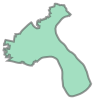

In [348]:
zipcodes.loc[0, 'geometry']

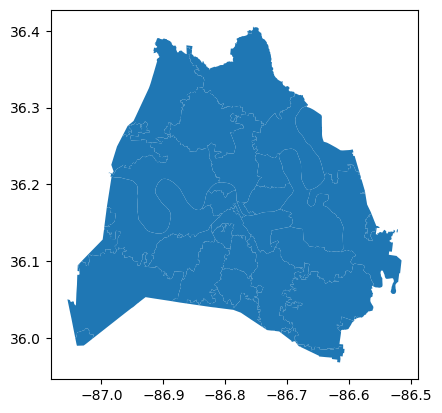

In [350]:
zipcodes.plot();

In [421]:
rr_geos = gpd.GeoDataFrame(red_river_missed_map, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(red_river_missed_map.lng, red_river_missed_map.lat))

In [423]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [447]:
stops_by_zip_rr = gpd.sjoin(rr_geos, zipcodes, predicate = 'within')

In [449]:
stops_by_zip_rr.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,lng,lat,geometry,index_right,zip,po_name
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1,1721259.366,685444.7996,-86.838103,36.213470,POINT (-86.8381 36.21347),27,37218,NASHVILLE
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20,1707026.753,659887.4716,-86.885562,36.142923,POINT (-86.88556 36.14292),12,37209,NASHVILLE
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209,RED RIVER,4203,20,1710185.772,664205.1011,-86.874995,36.154861,POINT (-86.87499 36.15486),12,37209,NASHVILLE
8,25330,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013,RED RIVER,4210,33,1794533.514,618749.3427,-86.588364,36.031728,POINT (-86.58836 36.03173),51,37013,ANTIOCH
10,25341,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed trash pickup - resident has at curb for...,3113 HYDES FERRY RD,37218,RED RIVER,4204,2,1721577.768,676018.3999,-86.836750,36.187584,POINT (-86.83675 36.18758),27,37218,NASHVILLE


In [451]:
stops_by_zip_rr['zip'].value_counts()

zip
37013    1888
37211    1527
37215    1079
37115     909
37218     711
37214     699
37205     622
37217     610
37209     510
37216     459
37207     434
37206     308
37204     251
37220     173
37210     161
37027     101
37212      78
37208      54
37189      51
37221      39
37086       3
Name: count, dtype: int64

In [453]:
stops_in_37207 = stops_by_zip_rr.loc[stops_by_zip_rr['zip'] == '37207']
stops_in_37207.shape

(434, 17)

In [455]:
polygon37207 = zipcodes.loc[zipcodes['zip'] == '37207']
polygon37207.shape

(2, 3)

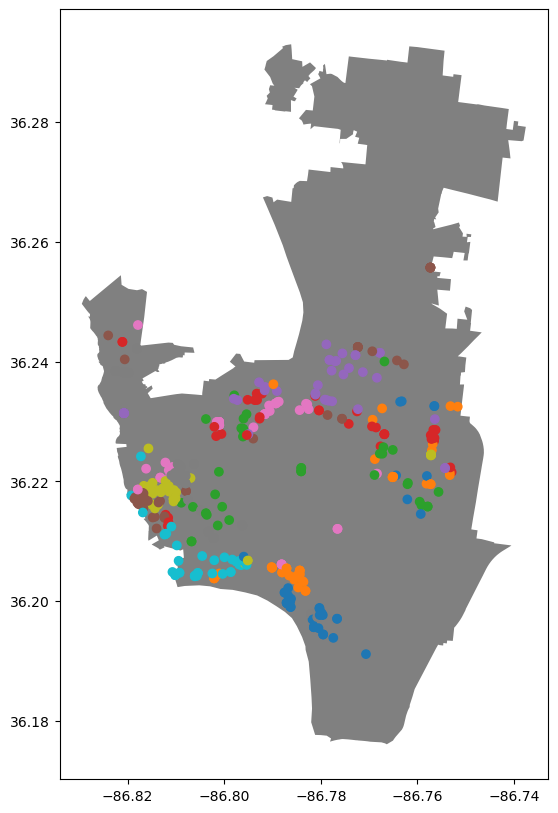

In [457]:
#fig, ax = matplotlib.subplots()
ax = polygon37207.plot(figsize = (8, 10), color = 'grey')
stops_in_37207.plot( ax = ax, column = 'Incident Address');
plt.show();

In [459]:
polygon37207.geometry.centroid

C:\Users\KLSHA\AppData\Local\Temp\ipykernel_29564\3792774199.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37207.geometry.centroid


19    POINT (-86.78726 36.28724)
42    POINT (-86.77677 36.23245)
dtype: geometry

In [461]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37207.geometry.centroid[42]
print(center)

POINT (-86.77676762469858 36.23245257407244)


C:\Users\KLSHA\AppData\Local\Temp\ipykernel_29564\3995710814.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37207.geometry.centroid[42]


In [463]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.23245257407244, -86.77676762469858]


In [465]:
#create our map of Nashville Zip Code 37207 and show it
map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_37207

In [467]:
i = 0
for row_index, row_values in stops_in_37207.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 167
values are:
 
Request Number                                                26864
Date Opened                                               11/8/2017
Request                        Trash - Curbside/Alley Missed Pickup
Description         customer says the trash pickup was missed again
Incident Address                             3210 Whites Creek Pike
Zip Code                                                      37207
Trash Hauler                                              RED RIVER
Trash Route                                                    3201
Council District                                                  3
State Plan X                                            1726432.966
State Plan Y                                            691919.2003
lng                                                       -86.82075
lat                                                       36.231374
geometry                           POINT (-86.82075005 36.23137438)
index_right          

In [469]:
#draw our zip code area: 37207
map_37207 = folium.Map(tiles = "Cartodb dark_matter", location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#iterate through stops_in_37207 to create locations and markers 
#for each trash stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Incident Address'])
    icon=folium.Icon(color="darkblue",icon="check", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
map_37207.save('../maps/map37207.html')

#display our map
map_37207

In [471]:
folium.Map?

Init signature:
folium.Map(
    location: Optional[Sequence[float]] = None,
    width: Union[str, float] = '100%',
    height: Union[str, float] = '100%',
    left: Union[str, float] = '0%',
    top: Union[str, float] = '0%',
    position: str = 'relative',
    tiles: Union[str, folium.raster_layers.TileLayer, NoneType] = 'OpenStreetMap',
    attr: Optional[str] = None,
    min_zoom: Optional[int] = None,
    max_zoom: Optional[int] = None,
    zoom_start: int = 10,
    min_lat: float = -90,
    max_lat: float = 90,
    min_lon: float = -180,
    max_lon: float = 180,
    max_bounds: bool = False,
    crs: str = 'EPSG3857',
    control_scale: bool = False,
    prefer_canvas: bool = False,
    no_touch: bool = False,
    disable_3d: bool = False,
    png_enabled: bool = False,
    zoom_control: Union[bool, str] = True,
    font_size: str = '1rem',
    **kwargs: Union[str, float, bool, Sequence, dict, NoneType],
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base m

In [473]:
cluster_map_37207 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37207)

folium.GeoJson(polygon37207).add_to(cluster_map_37207)

# inside the loop add each marker to the cluster
for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Incident Address'])
    icon=folium.Icon(color="blue",icon="check", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37207.save('../maps/cluster37207.html')

cluster_map_37207 

The above maps are for Red River Missed Pickups in Zip code 37027

In [482]:
trash_geo.groupby('Trash Hauler')['Date Opened'].count()

Trash Hauler
METRO         3481
Metro            1
RED RIVER    14337
WASTE IND     1343
Name: Date Opened, dtype: int64

Wanted to see what each Trash Hauler category was

In [485]:
METRO_missed_map = trash_geo.loc[(trash_geo['Request'] == 'Trash - Curbside/Alley Missed Pickup') & (trash_geo['Trash Hauler'] == 'METRO')]

In [489]:
metro_geos = gpd.GeoDataFrame(METRO_missed_map, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(METRO_missed_map.lng, METRO_missed_map.lat))

In [491]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [493]:
stops_by_zip_metro = gpd.sjoin(metro_geos, zipcodes, predicate = 'within')

In [495]:
metro_stops_in_37207 = stops_by_zip_metro.loc[stops_by_zip_metro['zip'] == '37207']
metro_stops_in_37207.shape

(344, 17)

In [497]:
polygon37207 = zipcodes.loc[zipcodes['zip'] == '37207']
polygon37207.shape

(2, 3)

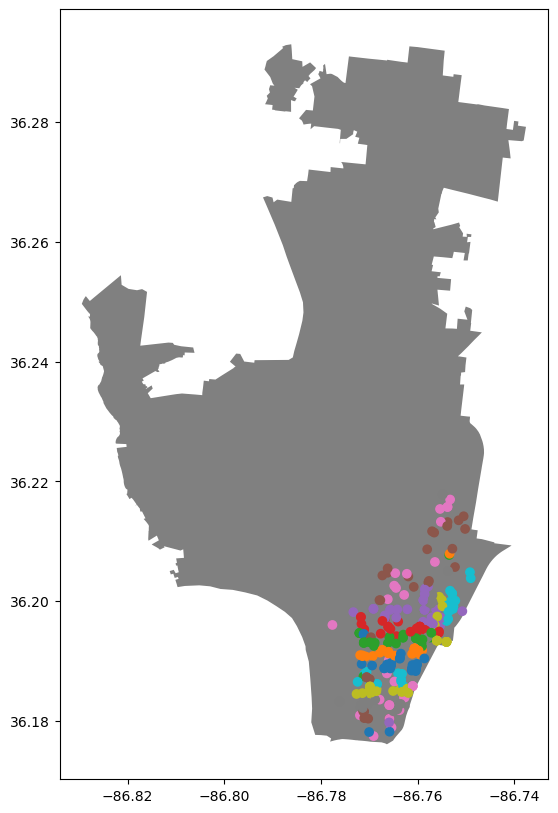

In [499]:
#fig, ax = matplotlib.subplots()
ax = polygon37207.plot(figsize = (8, 10), color = 'grey')
metro_stops_in_37207.plot( ax = ax, column = 'Incident Address');
plt.show();